In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import glob
from tqdm import tqdm
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split


## Loading Data


In [2]:
# For colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## To unzip images

# path_to_zip = "drive/MyDrive/img_align_celeba.zip"
# directory_to_extract_to = "drive/MyDrive/img_align_celeba"

# import zipfile
# with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [ ]:
images = glob.glob('drive/MyDrive/img_align_celeba/img_align_celeba/*.jpg')
len(images)

20661

In [ ]:
# Not sure if Colab messages up the order of the images or not, so just in case
print(images.sort())

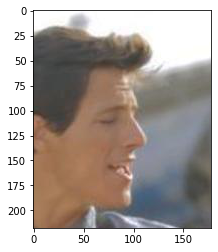

In [ ]:
plt.imshow(mpimg.imread(images[2]))

In [ ]:
x = []
size = 128
for i in tqdm(images[0:]):
  img = image.load_img(i, target_size=(size,size,3))
  img = image.img_to_array(img)
  x.append(img)

100%|██████████| 20661/20661 [01:09<00:00, 297.70it/s]


In [3]:
import csv 

save_path = "drive/MyDrive/input.csv"

In [ ]:
# # Convert input into a csv for later use (just so it's faster to load images)

# with open(save_path, 'w') as f:
#   writer = csv.writer(f, delimiter=',')

#   for i, img in enumerate(x):
#     np_img = np.array(img)
#     reshaped_img = np_img.reshape(1, -1)
#     writer.writerow(reshaped_img[0])

#     if i % 5000 == 0:
#       print(i, end=' ') 

0 5000 10000 15000 20000 

In [4]:
# Load image data from csv to numpy array

size = 14000
x = np.zeros((size, 128, 128, 3)) # CNN requires input shape to be (#samples, width, height, channels)

with open(save_path, 'r') as f:
  for i, img in enumerate(f):
    vals = np.array([float(i) for i in img.split(",")])
    vals = vals.reshape(128, 128, 3)
    x[i,:,:,:] = vals
    # x.append(vals)

    if i % 5000 == 0:
      print(i, end=' ') 

    if i == size - 1:
      break

    # plt.imshow(vals.astype(np.uint8))
    # plt.show()

0 5000 10000 

In [24]:
# # Convert list_attr_celeba.txt to csv file

# import csv 

# txt_file = "drive/MyDrive/list_attr_celeba.txt"
# csv_file = "drive/MyDrive/list_attr_celeba1.csv"

# with open(txt_file, 'r') as infile, open(csv_file, 'w') as outfile:
#   writer = csv.writer(outfile)

#   for i, line in enumerate(infile):
#     if 0 < i < 20664: 
#       attr = line.split(' ')
#       while '' in attr: attr.remove('')
#       attr[-1] = attr[-1].replace("\n", '')

#       if i == 1: attr.insert(0, 'img_num'); attr.pop()

#       writer.writerows([attr])

#       if i < 10: print(attr)

['img_num', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
['000001.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '-1', '1', '1', '-1', '1', '-1', '1', '-1', '-1', '1']
['000002.jpg', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '-1', '-1', '1', '-1

In [ ]:
print(attr)

['202599.jpg', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '1', '1', '-1', '-1', '-1', '-1', '-1', '1', '-1', '-1', '1', '-1', '-1', '1\n']


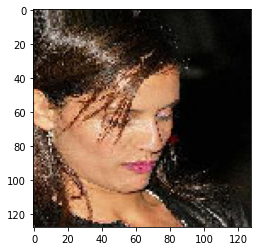

In [ ]:
plt.imshow(x[3].astype(np.uint8))
plt.show()

In [5]:
csv_file = "drive/MyDrive/list_attr_celeba1.csv"
data = pd.read_csv(csv_file)

In [6]:
# Replace -1's to 0's so "Binary_Crossentropy" can be used

data = data.replace(-1, 0)

In [6]:
print(data)

          img_num  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0      000001.jpg                 0  ...                0      1
1      000002.jpg                 0  ...                0      1
2      000003.jpg                 0  ...                0      1
3      000004.jpg                 0  ...                0      1
4      000005.jpg                 0  ...                0      1
...           ...               ...  ...              ...    ...
20657  020658.jpg                 0  ...                0      1
20658  020659.jpg                 0  ...                0      1
20659  020660.jpg                 0  ...                0      1
20660  020661.jpg                 1  ...                0      1
20661  020662.jpg                 0  ...                0      1

[20662 rows x 41 columns]


## Shuffle/Split Data

In [7]:
idx = np.random.choice(np.arange(len(x)), 11000, replace=False)
x_shuffled = x[idx]
y_shuffled = data.iloc[idx]

In [8]:
# x = None

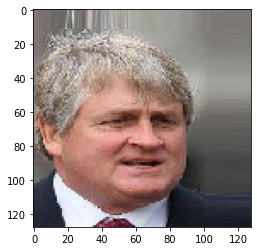

img_num                004200.jpg
5_o_Clock_Shadow                0
Arched_Eyebrows                 0
Attractive                      0
Bags_Under_Eyes                 1
Bald                            0
Bangs                           0
Big_Lips                        0
Big_Nose                        1
Black_Hair                      0
Blond_Hair                      0
Blurry                          0
Brown_Hair                      0
Bushy_Eyebrows                  0
Chubby                          1
Double_Chin                     1
Eyeglasses                      0
Goatee                          0
Gray_Hair                       0
Heavy_Makeup                    0
High_Cheekbones                 1
Male                            1
Mouth_Slightly_Open             1
Mustache                        0
Narrow_Eyes                     1
No_Beard                        1
Oval_Face                       0
Pale_Skin                       0
Pointy_Nose                     0
Receding_Hairl

In [8]:
i = 0
plt.imshow(x_shuffled[i].astype(np.uint8))
plt.show()

print(y_shuffled.iloc[0])

## CNN for Binary Classification of one attribute. Black Hair was chosen for this. Only first 3000 samples were used to train/test.

In [8]:
layers = [64, 128, 256, 512]

In [9]:
# Creates the convolutional neural network
def create_model(num_layers):
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    for i in range(num_layers):
      model.add(keras.layers.Conv2D(layers[i], (3, 3)))
      model.add(keras.layers.Activation('relu'))
      model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(layers[num_layers]))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model


In [10]:
x_data = x_shuffled/255
y_data = y_shuffled

In [11]:
# x_shuffled = y_shuffled = None

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2)

In [13]:
# x_data = None

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [14]:
accuracies = []

In [15]:
# def test(i):
#   model = create_model(i)
#   model.fit(x_train, y_train, epochs=12, verbose=0)
#   accuracies.append(model.evaluate(x_val, y_val)[1])

In [16]:
for i in range(4):
  model = create_model(i)
  model.fit(x_train, y_train, epochs=12, verbose=0)
  accuracies.append(model.evaluate(x_val, y_val)[1])

for i, accuracy in enumerate(accuracies):
  print("Num layers: {} --> Accuracy: {}".format(i + 1, accuracy))

55/55 [==============================] - 1s 8ms/step - loss: 0.5223 - accuracy: 0.8142
Num layers: 1 --> Accuracy: 0.7443181872367859
Num layers: 2 --> Accuracy: 0.7579545378684998
Num layers: 3 --> Accuracy: 0.8460227251052856
Num layers: 4 --> Accuracy: 0.8142045736312866


In [ ]:
# # If data was loaded directly into x using the 
# # '''for i in tqdm(images[0:]):''' code,
# # we have to reshape for CNN input since 
# # it wants data in the shape of (#samples, width, height, channels)

# x_train = np.array(x_train)
# x_test = np.array(x_test)

# x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
# x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

In [14]:
num_layers = 3

model = create_model(num_layers)
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
275/275 [==============================] - 39s 22ms/step - loss: 0.5847 - accuracy: 0.7571
Epoch 2/40
275/275 [==============================] - 6s 22ms/step - loss: 0.3331 - accuracy: 0.8529
Epoch 3/40
275/275 [==============================] - 6s 22ms/step - loss: 0.3129 - accuracy: 0.8618
Epoch 4/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2908 - accuracy: 0.8664
Epoch 5/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2841 - accuracy: 0.8726
Epoch 6/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2652 - accuracy: 0.8831
Epoch 7/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2504 - accuracy: 0.8942
Epoch 8/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2307 - accuracy: 0.8996
Epoch 9/40
275/275 [==============================] - 6s 22ms/step - loss: 0.2097 - accuracy: 0.9092
Epoch 10/40
275/275 [==============================] - 6s 22ms/step - loss: 0.1926 - accur

In [15]:
print('Model evaluation ', model.evaluate(x_test, y_test))

69/69 [==============================] - 1s 11ms/step - loss: 0.6305 - accuracy: 0.8482
Model evaluation  [0.6305011510848999, 0.8481818437576294]


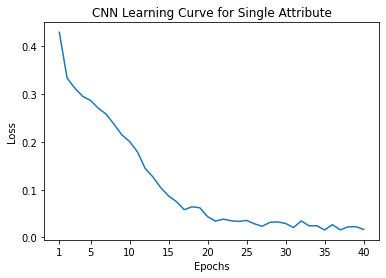

In [16]:
epochs = [i + 1 for i in range(40)]
epoch_ticks = [i for i in range(0, 45, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history.history["loss"])
plt.title("CNN Learning Curve for Single Attribute")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

[[0.9999957]]
1


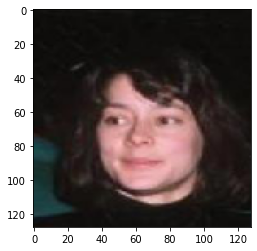

In [45]:
i = 15

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow((x_test[i] * 255).astype(np.uint8))
plt.show()

## CNN for multilabel classication. Heavy_Makeup, High_Cheekbones, Male, and Mouth_Slightly_Open were used. Only first 3000 samples were used to train/test 

In [9]:
# Creates the convolutional neural network
def create_multi_label_model():
    model = keras.models.Sequential()

    # First layer of CNN with input layer
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Second layer of CNN
    model.add(keras.layers.Conv2D(64, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Third layer of CNN
    model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Fourth layer of CNN
    model.add(keras.layers.Conv2D(256, (3, 3), padding='SAME'))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='SAME'))

    # Flatten the output and create fully connected layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512))
    model.add(keras.layers.Dense(1024))

    # Output layer with 1 different class
    model.add(keras.layers.Dense(4))
    model.add(keras.layers.Activation('sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [9]:
x_data = x_shuffled/255 # Testing out data normalization
y_data = y_shuffled.iloc[:,19:23]

In [10]:
print(y_data)

       Heavy_Makeup  High_Cheekbones  Male  Mouth_Slightly_Open
5343              0                0     0                    0
13103             0                0     1                    0
8499              0                1     0                    1
6371              1                1     0                    0
13006             0                0     1                    0
...             ...              ...   ...                  ...
6545              1                0     0                    0
13130             1                0     0                    1
3212              0                1     1                    1
11039             1                0     0                    0
4650              0                1     1                    1

[10000 rows x 4 columns]


In [10]:
# x_shuffled = y_shuffled = None

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

In [12]:
# x_data = y_data = None

In [14]:
model = create_multi_label_model()
history = model.fit(x_train, y_train, epochs=60)

y_predict = model.predict(x_test)
y_predict = y_predict.round()

i = 1

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

Epoch 1/60
275/275 [==============================] - 40s 23ms/step - loss: 0.6404 - accuracy: 0.3194
Epoch 2/60
275/275 [==============================] - 6s 23ms/step - loss: 0.3603 - accuracy: 0.5264
Epoch 3/60
275/275 [==============================] - 6s 23ms/step - loss: 0.2829 - accuracy: 0.5269
Epoch 4/60
275/275 [==============================] - 6s 23ms/step - loss: 0.2421 - accuracy: 0.5277
Epoch 5/60
275/275 [==============================] - 6s 23ms/step - loss: 0.2278 - accuracy: 0.5389
Epoch 6/60
275/275 [==============================] - 6s 23ms/step - loss: 0.2120 - accuracy: 0.5353
Epoch 7/60
275/275 [==============================] - 6s 23ms/step - loss: 0.1990 - accuracy: 0.5452
Epoch 8/60
275/275 [==============================] - 6s 23ms/step - loss: 0.1864 - accuracy: 0.5418
Epoch 9/60
275/275 [==============================] - 6s 23ms/step - loss: 0.1796 - accuracy: 0.5392
Epoch 10/60
275/275 [==============================] - 6s 23ms/step - loss: 0.1646 - accur

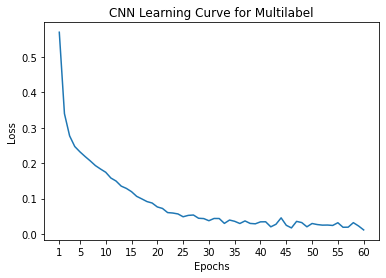

In [15]:
epochs = [i + 1 for i in range(60)]
epoch_ticks = [i for i in range(0, 65, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history.history["loss"])
plt.title("CNN Learning Curve for Multilabel")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [13]:
model = create_multi_label_model()
history = model.fit(x_train, y_train, epochs=60)

y_predict = model.predict(x_test)
y_predict = y_predict.round()


Epoch 1/60
250/250 [==============================] - 40s 23ms/step - loss: 0.6456 - accuracy: 0.3163
Epoch 2/60
250/250 [==============================] - 6s 22ms/step - loss: 0.3587 - accuracy: 0.5064
Epoch 3/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2988 - accuracy: 0.5115
Epoch 4/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2679 - accuracy: 0.5084
Epoch 5/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2467 - accuracy: 0.5174
Epoch 6/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2249 - accuracy: 0.5351
Epoch 7/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2224 - accuracy: 0.5156
Epoch 8/60
250/250 [==============================] - 6s 22ms/step - loss: 0.2009 - accuracy: 0.5473
Epoch 9/60
250/250 [==============================] - 6s 22ms/step - loss: 0.1900 - accuracy: 0.5400
Epoch 10/60
250/250 [==============================] - 6s 22ms/step - loss: 0.1834 - accur

In [14]:
i = 1

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

Heavy_Makeup           0
High_Cheekbones        0
Male                   1
Mouth_Slightly_Open    0
Name: 4828, dtype: int64
[0. 0. 1. 0.]
0.5865


## Visualize Data (Just a count of labels per attribute)

In [ ]:
sums = data[:20661].sum(axis = 0, skipna = True)

In [ ]:
pos = [sums[i] for i in range(1, len(sums))]

In [ ]:
negs = [20661 - pos[i] for i in range(len(pos))]

In [ ]:
categories = list(data.columns.values)[1:]

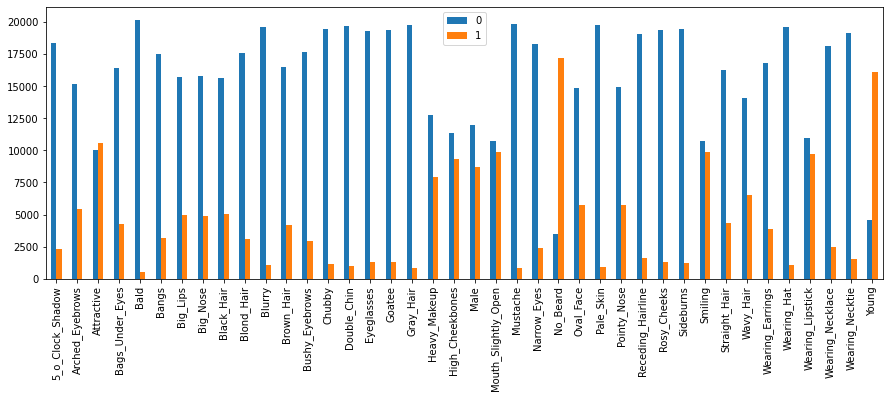

In [ ]:
df = pd.DataFrame(np.c_[negs, pos], index=categories)
df.plot.bar(figsize=(15, 5))

plt.show()

## Transfer Learning (one attribute)

In [9]:
x_data = x_shuffled
y_data = y_shuffled

In [10]:
# x_shuffled = None
# y_shuffled = None

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.Black_Hair, test_size=0.2, random_state = 1)

In [11]:
# x_data = None

### Trying VGGnet

In [13]:
from keras.applications.vgg16 import VGG16

In [14]:
# load model without classifier layers
model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# add new classifier layers
flat1 = keras.layers.Flatten()(model.layers[-1].output)
X = keras.layers.Dense(1024, activation='relu')(flat1)
output = keras.layers.Dense(1, activation='sigmoid')(X)
# define new model
model = keras.models.Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [15]:
history = model.fit(x_train, y_train, epochs=40)

print('Model evaluation ', model.evaluate(x_test, y_test))

Epoch 1/40
250/250 [==============================] - 68s 124ms/step - loss: 16.2631 - accuracy: 0.7420
Epoch 2/40
250/250 [==============================] - 31s 125ms/step - loss: 0.4676 - accuracy: 0.7650
Epoch 3/40
250/250 [==============================] - 32s 127ms/step - loss: 0.3831 - accuracy: 0.8175
Epoch 4/40
250/250 [==============================] - 32s 128ms/step - loss: 0.3433 - accuracy: 0.8363
Epoch 5/40
250/250 [==============================] - 33s 130ms/step - loss: 0.3321 - accuracy: 0.8473
Epoch 6/40
250/250 [==============================] - 33s 131ms/step - loss: 0.3109 - accuracy: 0.8571
Epoch 7/40
250/250 [==============================] - 33s 133ms/step - loss: 0.3356 - accuracy: 0.8548
Epoch 8/40
250/250 [==============================] - 33s 132ms/step - loss: 0.2854 - accuracy: 0.8706
Epoch 9/40
250/250 [==============================] - 33s 132ms/step - loss: 0.2994 - accuracy: 0.8621
Epoch 10/40
250/250 [==============================] - 33s 132ms/step - 

### Trying ResNet50

In [17]:
from keras.applications.resnet50 import ResNet50

In [21]:
# load model without classifier layers
model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# freeze layers
for layer in model.layers[:45]:
    layer.trainable = False

# add new classifier layers
flat1 = keras.layers.Flatten()(model.layers[-1].output)
X = keras.layers.Dense(256, activation='relu')(flat1)
X = keras.layers.Dropout(0.5)(X)
X = keras.layers.BatchNormalization()(X)
X = keras.layers.Dense(128, activation='relu')(flat1)
X = keras.layers.Dropout(0.5)(X)
X = keras.layers.BatchNormalization()(X)
output = keras.layers.Dense(1, activation='sigmoid')(X)

# define new model
model = keras.models.Model(inputs=model.inputs, outputs=output)

# summarize
model.summary()
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [22]:
history1 = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
275/275 [==============================] - 41s 126ms/step - loss: 0.5655 - accuracy: 0.7344
Epoch 2/40
275/275 [==============================] - 35s 126ms/step - loss: 0.3351 - accuracy: 0.8475
Epoch 3/40
275/275 [==============================] - 34s 125ms/step - loss: 0.3004 - accuracy: 0.8681
Epoch 4/40
275/275 [==============================] - 35s 126ms/step - loss: 0.2715 - accuracy: 0.8848
Epoch 5/40
275/275 [==============================] - 35s 126ms/step - loss: 0.3497 - accuracy: 0.8355
Epoch 6/40
275/275 [==============================] - 35s 126ms/step - loss: 0.2931 - accuracy: 0.8720
Epoch 7/40
275/275 [==============================] - 35s 126ms/step - loss: 0.2616 - accuracy: 0.8858
Epoch 8/40
275/275 [==============================] - 35s 126ms/step - loss: 0.2391 - accuracy: 0.9004
Epoch 9/40
275/275 [==============================] - 35s 126ms/step - loss: 0.2212 - accuracy: 0.9030
Epoch 10/40
275/275 [==============================] - 35s 126ms/step - l

In [23]:
print('Model evaluation ', model.evaluate(x_test, y_test))

69/69 [==============================] - 4s 47ms/step - loss: 0.5288 - accuracy: 0.8759
Model evaluation  [0.5287917256355286, 0.8759090900421143]


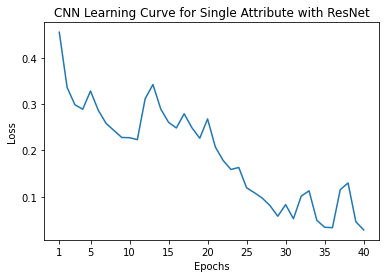

In [24]:
epochs = [i + 1 for i in range(40)]
epoch_ticks = [i for i in range(0, 45, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history1.history["loss"])
plt.title("CNN Learning Curve for Single Attribute with ResNet")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

[[0.95930105]]
1


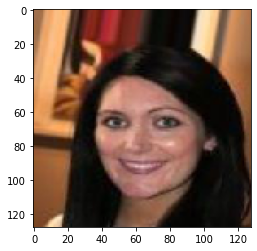

In [ ]:
i = 3

test = x_test[i].reshape(1, 128, 128, 3)
print(model.predict(test))
print(y_test.iloc[i])
plt.imshow(x_test[i].astype(np.uint8))
plt.show()

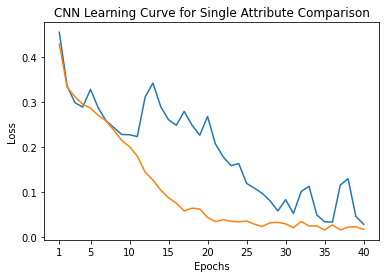

In [25]:
epochs = [i + 1 for i in range(40)]
epoch_ticks = [i for i in range(0, 45, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history1.history["loss"], epochs, history.history["loss"])
plt.title("CNN Learning Curve for Single Attribute Comparison")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Transfer Learning for multilabel (Emily's model)

In [13]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

In [14]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3))
resnet.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
__________________________

In [14]:
for layer in resnet.layers[:45]:
    layer.trainable = False

In [15]:
import tensorflow.keras as K
import tensorflow as tf

In [20]:
def create_transfer_model_2():
    input_t = K.Input(shape=(128, 128, 3))
    res_model = K.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)
    
    for layer in res_model.layers[:45]:
        layer.trainable = False
    #to_res = (224, 224)
    model = K.models.Sequential()
    #model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
    model.add(res_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(256, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(128, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(64, activation='relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.BatchNormalization())
    model.add(K.layers.Dense(4, activation='sigmoid')) #this 
    
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [22]:
transfer_model_2 = create_transfer_model_2()
history1 = transfer_model_2.fit(x_train, y_train, epochs=60)


Epoch 1/60
275/275 [==============================] - 41s 129ms/step - loss: 0.7317 - accuracy: 0.3398
Epoch 2/60
275/275 [==============================] - 35s 128ms/step - loss: 0.4034 - accuracy: 0.5321
Epoch 3/60
275/275 [==============================] - 35s 128ms/step - loss: 0.3424 - accuracy: 0.5488
Epoch 4/60
275/275 [==============================] - 35s 128ms/step - loss: 0.3164 - accuracy: 0.5517
Epoch 5/60
275/275 [==============================] - 35s 128ms/step - loss: 0.2934 - accuracy: 0.5613
Epoch 6/60
275/275 [==============================] - 35s 128ms/step - loss: 0.2818 - accuracy: 0.5545
Epoch 7/60
275/275 [==============================] - 35s 128ms/step - loss: 0.2666 - accuracy: 0.5558
Epoch 8/60
275/275 [==============================] - 35s 128ms/step - loss: 0.2662 - accuracy: 0.5465
Epoch 9/60
275/275 [==============================] - 35s 128ms/step - loss: 0.2626 - accuracy: 0.5511
Epoch 10/60
275/275 [==============================] - 35s 128ms/step - l

In [23]:
i = 1

y_predict = transfer_model_2.predict(x_test)
y_predict = y_predict.round()

from sklearn.metrics import accuracy_score
print(y_test.iloc[i])
print(y_predict[i])
acc = accuracy_score(y_test, y_predict)
print(acc)

Heavy_Makeup           1
High_Cheekbones        1
Male                   0
Mouth_Slightly_Open    0
Name: 10482, dtype: int64
[1. 1. 0. 0.]
0.6363636363636364


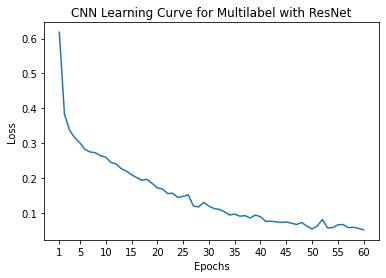

In [25]:
epochs = [i + 1 for i in range(60)]
epoch_ticks = [i for i in range(0, 65, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history1.history["loss"])
plt.title("CNN Learning Curve for Multilabel with ResNet")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

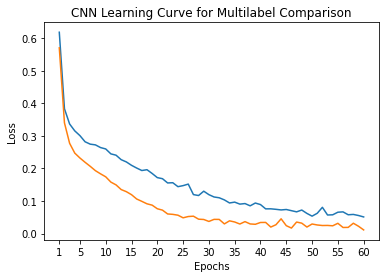

In [26]:
epochs = [i + 1 for i in range(60)]
epoch_ticks = [i for i in range(0, 65, 5)] 
epoch_ticks[0] = 1

# Graphs the learning curve
plt.plot(epochs, history1.history["loss"], epochs, history.history["loss"])
plt.title("CNN Learning Curve for Multilabel Comparison")
plt.xticks(epoch_ticks)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()